![Wolfe](https://s3.amazonaws.com/lquant-images/wolfe_luo.jpg)

## Overview of Portfolio Simulator (Backtester)

Features:
1. Upload custom data 
2. Backtest WEIGHT using multi-day portfolio simulation 

### Data for Portfolio Simulation

In [1]:
import pandas as pd
data = pd.read_csv('PortSimulator.csv')
data.head()

,DATE,WEIGHT,TICKER
0,2021-01-29,0.000325,AAL
1,2021-01-29,0.000258,PNW
2,2021-01-29,0.006676,ABT
3,2021-01-29,0.003139,AMD
4,2021-01-29,0.001797,APD


In [2]:
data.DATE.unique()

array(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
       '2021-05-28', '2021-06-30', '2021-07-30', '2021-08-31',
       '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
       '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30'],
      dtype=object)

## Requirements and Presteps

1. Copy pyqes [python file]( https://github.com/wolferesearch/docs/tree/master/micro-services/api/python/pyqes) from github to your local directory from Github. 
2. Ensure you have [Pandas](https://pandas.pydata.org/) and [requests](https://pypi.org/project/requests/) package in your python kernel. 

## Authentication and Connection

The API is protected using Username and Password. In case you have not received it, please [email](mailto:luo.qes@wolferesearch.com) to apply for API account. 

The connection object is the gateway to accessing the API. It allows you to access the catalog, portfolios, templates, risk models etc. 

In [1]:
## Open connection using username/password. 
from pyqes import micsvc
connection = micsvc.Connection(username='*******', password = '*******')

In [2]:
# Use connection object to get a new instance of black litterman
sim = connection.get_portsimulator()

### Set Capital for Backtesting

Parameters
1. currency: The currency for funding. This will be used as the main cash account for the trading
2. cash: Initial cash amount, can be less than or greater than notional. The simulator allows the cash to become negative (i.e., margin). 
3. notional: Notional value of the positions. It is expected that weights are provided at each rebalance. The notional is used to estimate the number of shares and dollar positions

In [5]:
_ = sim.set_capital(currency = 'USD',cash = 5e7, notional = 1e8)

### Max Volume Participation Contraint

The backtest can limit the amount it trades on each day. Usually if the notional is small and there is a good volume on the rebalance day, all shares will be traded the same day. However, if there is less liquidity on the day, the remaining part trades the next day, so on and so forth. In case there is no liquidity at all, the simulator will throw an error. 



In [6]:
_ = sim.set_max_vol_participation(max_part = 0.06)

### Transaction Cost Function

Transaction cost function allows user to control the market impact based on the following signature:

Signature of the function is something like this:

```

Signature of the Function (Uses R Syntax)

function(value,price,shares,spread,volatility,volume) {
    #value: value of the traded in funding currency
    #price: local price of the stock
    #shares: number of shares to trade (For shorting the shares are negative
    #spread: spread in local currency
    #volume: Volume traded in terms of the shares
    
    // Should return the cost of the trading in local currency, e.g., 
    part = (abs(shares))/volume
    return(spread*part/0.05)
}

value = value, price = prc[d], shares = shrs, 
            spread = spread[d], volatility = volatility[d], volume = volume[d]
```

In [7]:
NO_COST_FN = "function(...) {return(0)}"

LINEAR_COST_FN = """function(value,price,shares,spread,volatility,volume) {
    #value: value of the traded in funding currency
    #price: local price of the stock
    #shares: number of shares to trade
    #spread: spread in local currency
    #volume: Volume traded in terms of the shares   
    # Should return the cost of the trading in local currency, e.g., 
    part = (abs(shares))/volume
    return(spread*part/0.05)
}
"""

_ = sim.set_txn_cost_function(LINEAR_COST_FN)

#### Set data for portfolio simulation

We will bascially upload the pandas data frame that simulation will use

In [8]:
sim.set_user_data(name = 'sim_data.csv', data = data)

In [9]:
sim.submit()

In [4]:
sim.info()

{'endTime': '"2023-02-02 22:57:43.402088"',
 'message': 'Job Completed 0',
 'startTime': '"2023-02-02 22:57:35.794946"',
 'status': 'SUCCESS',
 'type': 8,
 'uuid': '1e03d718-bd4c-4ba3-be3e-5b006c4b1376'}

In [5]:
results = sim.get_results()

In [3]:
sim.set_id('1e03d718-bd4c-4ba3-be3e-5b006c4b1376')

### Setting up Plot Function

In [85]:
import datetime
%matplotlib inline

def _plot_(series, title, ylabel, kind = 'line'):
    series.index = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in series.index]
    _ = series.plot(title = title, figsize = (12,6), legend = False, fontsize = 14, kind = kind)
    _ = ax.set_xlabel('Date', fontsize = 16)
    _ = ax.set_ylabel(ylabel, fontsize = 16)
    _ = ax.set_title(title,fontsize = 20)
    return ax

### Analyzying Portfolio Simulation Data

#### Portfolio Values

The timeseries represents the total value of the Strategy (Unrealized + Realized). Its value should start with the cash held in account and grow based on the performance of the portfolio. It is value is computed date in the base currency

Net Values = Cash + Long Values - Short Values

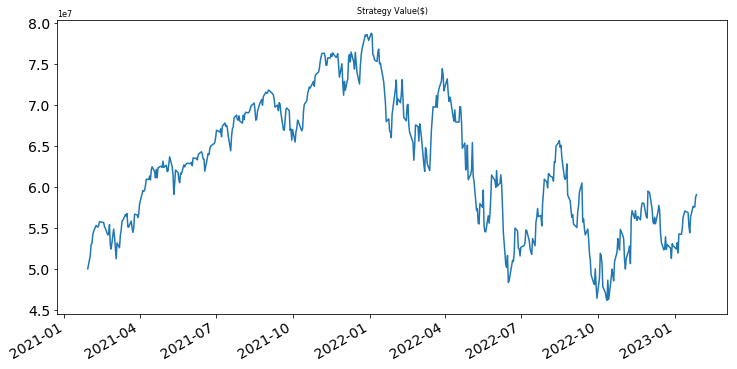

In [86]:
ax = _plot_(series = results.net_values(), ylabel = '$ Value', title = 'Strategy Value($)')

#### Returns
Returns are computed using the percentage change 

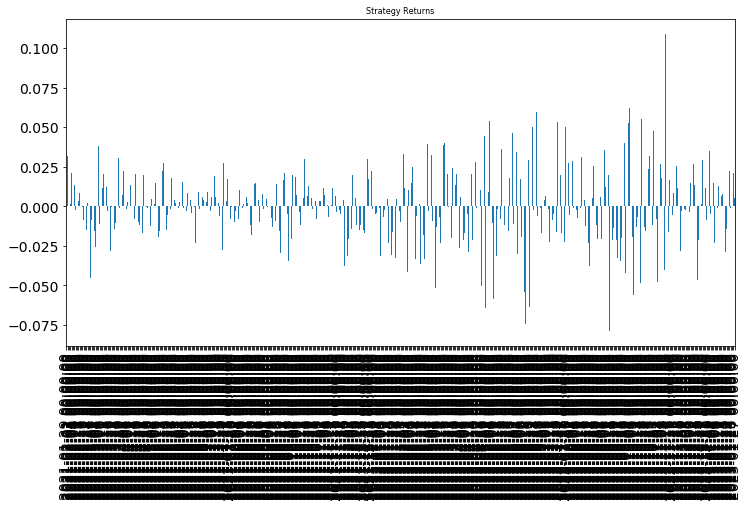

In [88]:
_ = _plot_(series = results.returns(), title = 'Strategy Returns', ylabel = '$ Value', kind = 'bar')

In [ ]:
results.returns().plot()

In [ ]:
#results = sim.get_results()

type(sim.req)

In [ ]:
data = {'result':result.data}

In [ ]:
result.data

In [ ]:
result = PortSimulatorOutput(output,None)

In [ ]:
result = PortSimulatorOutput(5e7,output,data)

In [ ]:
abs(result.returns())

In [ ]:
c = result.cash()
c.index = v.index

In [ ]:
l1 = list(v.index)
l2 = list(c.index)

In [ ]:
v.add(c)

In [ ]:
#pd.concat([data[dt]['cash'] for dt in dates])

In [ ]:
class PortSimulatorOutput:
    
    def __init__(self, init_cash, output, data = None):
        self.output = output
        self.init_cash = init_cash
        if data is None:
            self.data = output.get_data()['result']
        else:
            self.data = data['result']
        dates = list(self.data.keys())
        dates.sort()
        self.dates = dates
        
    def _v_(self,name):
        return pd.concat([self.data[dt][name] for dt in self.dates])
    
    def _m_(self,name):
        return pd.concat([self.data[dt][name] for dt in self.dates],axis=1)
    
    def cash(self):
        return self._v_('cash')
    
    def shares_traded(self):
        return self._m_('shares_traded')
    
    def shares(self):
        return self._m_('shares')
    
    def short_values(self):
        return self._v_('short_values')
    
    def long_values(self):
        return self._v_('long_values')
    
    def net_values(self):
        return self.values().add(self.cash())
    
    def value_traded(self):
        return self._m_('value_traded')
    
    def next_notional(self):
        return self._v_('next_notional')
    
    def target_notional(self):
        return self._v_('target_notional')
    
    def realized_notional(self):
        return self._v_('realized_notional')
    
    def values(self):
        return self._v_('values')
    
    def exec_price(self):
        return self._m_('exec_prc')

    def div_payout(self):
        return self._v_('div_accum')
    
    def returns(self):
        return self.net_values().pct_change()



In [ ]:
%matplotlib inline
data['result']['2022-06-30']['cash'].plot()

In [ ]:
x

In [ ]:
connection.URL + '/' + 'job/content/' + sim.esvc.uuid

In [ ]:
respons = connection.session.get(connection.URL + '/' + 'job/content/' + sim.esvc.uuid)

#sim.esvc.uuid

In [ ]:
respons.content

In [ ]:
??connection.get

In [ ]:
output = sim.get_output()